This notebook is the paper visuals as they will hopefully appear in the manuscript, with alternates as we narrow down what we want. 

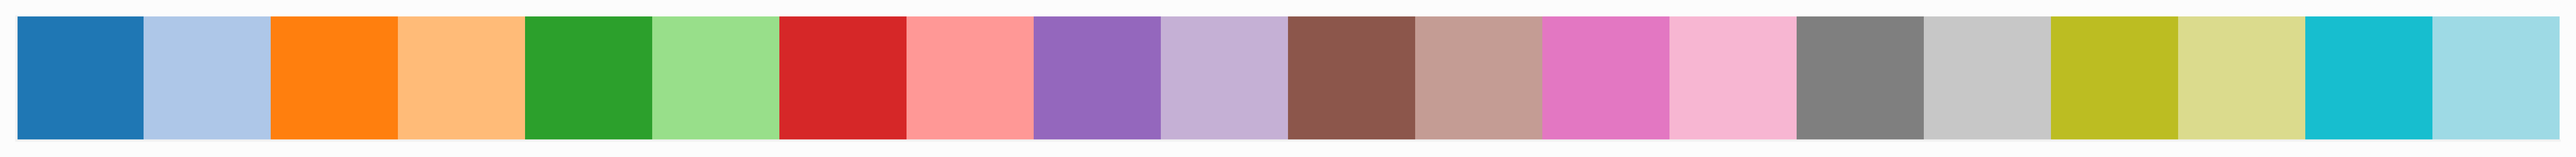

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

USE_DARK = False
palette = 'tab20'

cs = sns.color_palette(palette, 20)
sns.palplot(sns.color_palette(palette, 20))

rc = {
    'font.family': 'IBM Plex Sans',
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.figsize': (12, 7),
    'grid.alpha': 0,
}

if USE_DARK:
    COLORS = {
        'fg': '0.8',
        'fg_muted': '0.7',
        'bg': '0.1',
        'bg_muted': '0.2'
    }
    SNS_STYLE='dark'
else:
    COLORS = {
        'fg': '0.1',
        'fg_muted': '0.2',
        'bg': '0.99',
        'bg_muted': '0.95',
    }
    SNS_STYLE='white'
    
    
rc.update({
    'text.color': COLORS['fg'],
    'figure.facecolor': COLORS['bg'],
    'axes.facecolor': COLORS['bg'],
    'axes.edgecolor': COLORS['bg_muted'],
    'axes.labelcolor': COLORS['fg_muted'],
    'xtick.color': COLORS['fg'],
    'ytick.color': COLORS['fg'],
    'legend.edgecolor': COLORS['bg_muted'],
})

NATURE = {
    'font.family': "Nimbus Sans",
    'font.size': 7,
    'figure.figsize': (7.72, 4.45),
    'figure.dpi': 400,
    'savefig.dpi': 400,
    'savefig.facecolor': '0.99',
    'savefig.edgecolor': '0.99',
    'lines.linewidth': 1.5,
}
rc.update(NATURE)

COL1 = '#999'
COL2 = 'black'
COL3 = cs[7]
    
sns.set(context='paper', style=SNS_STYLE, palette=palette, rc=rc)

In [20]:
# only use myths
exp1 = pd.read_pickle("exp1-data.pkl").query('truth == 0')
exp2 = pd.read_pickle("exp2-data.pkl").query('truth == 0')

INTR = 1
CTRL = 2
ID_COL = 'What is your Prolific ID?'

exp1_questions = [
    'daddy-long-legs', 'women-talk-more', 'mozart-boosts-iq', 'sugar-hyperactive', 
    'ostriches-hide-head', 'urine-jellyfish-sting', '90%-communication-nonverbal',
    'goldfish-short-memory', 'use-10%-of-brain', 
    'alcohol-cooks-off', 'testosterone-helps-memory', 'gender-pay-gap', 'cops-dying-more', 
    'gun-murders-highest', 'redheads-dying-out', 'placenta-side-gender',
    'sharks-no-cancer', 'marmite-meat-based',
    'saunas-sweat-toxins','mercury-vaccines-harmful', 'cancer-alternative-medicine',
    'wifi-no-cause-cancer', 'illegal-immigrants-crime-less', 'caucasian-blue-eyes',
    'sleepwalkers-complex-tasks', 'universal-gestures', 'taller-in-morning', 
    'opera-shatter-glass', 'carrots-skin-orange', 'yawning-contagious', 'dogs-chocolate-bad',
    'laughing-improves-vascular', 'glasses-linked-iq', 'cockroach-headless', 
    '80%-ocean-unexplored', 'honey-antibacterial', 'tsunami-caused-earthquake',
    'elephants-never-forget', 'achoo', 'hypnosis-pain', 'dogs-smell-cancer', 'humans-regrow-tips',
]
exp2_questions = ['daddy-long-legs', 'women-talk-more', 'wifi-no-cause-cancer', 'illegal-immigrants-crime-less', 'mozart-boosts-iq', 'sugar-hyperactive', 
        'ostriches-hide-head', 'cancer-alternative-medicine', 'caucasian-blue-eyes', 'sleepwalkers-complex-tasks', 'universal-gestures', 
         'taller-in-morning', 'urine-jellyfish-sting', 'opera-shatter-glass', 'carrots-skin-orange', '90%-communication-nonverbal',
        'yawning-contagious', 'goldfish-short-memory', 'use-10%-of-brain', 'dogs-chocolate-bad', 'laughing-improves-vascular', 
        'alcohol-cooks-off', 'testosterone-helps-memory', 'gender-pay-gap', 'glasses-linked-iq', 'cops-dying-more', 'cockroach-headless',
        'gun-murders-highest', 'redheads-dying-out', 'placenta-side-gender', '80%-ocean-unexplored', 'honey-antibacterial',
        'sharks-no-cancer', 'tsunami-caused-earthquake', 'marmite-meat-based', 'elephants-never-forget', 'achoo', 'hypnosis-pain',
        'saunas-sweat-toxins', 'dogs-smell-cancer', 'humans-regrow-tips', 'mercury-vaccines-harmful']
exp2_myths = np.array([ 0,  1,  4,  5,  6,  7, 12, 15, 17, 18, 21, 22, 23, 25, 27, 28, 29,
       32, 34, 38, 41])

# Figure 1 (Item-Level Scatterplots)

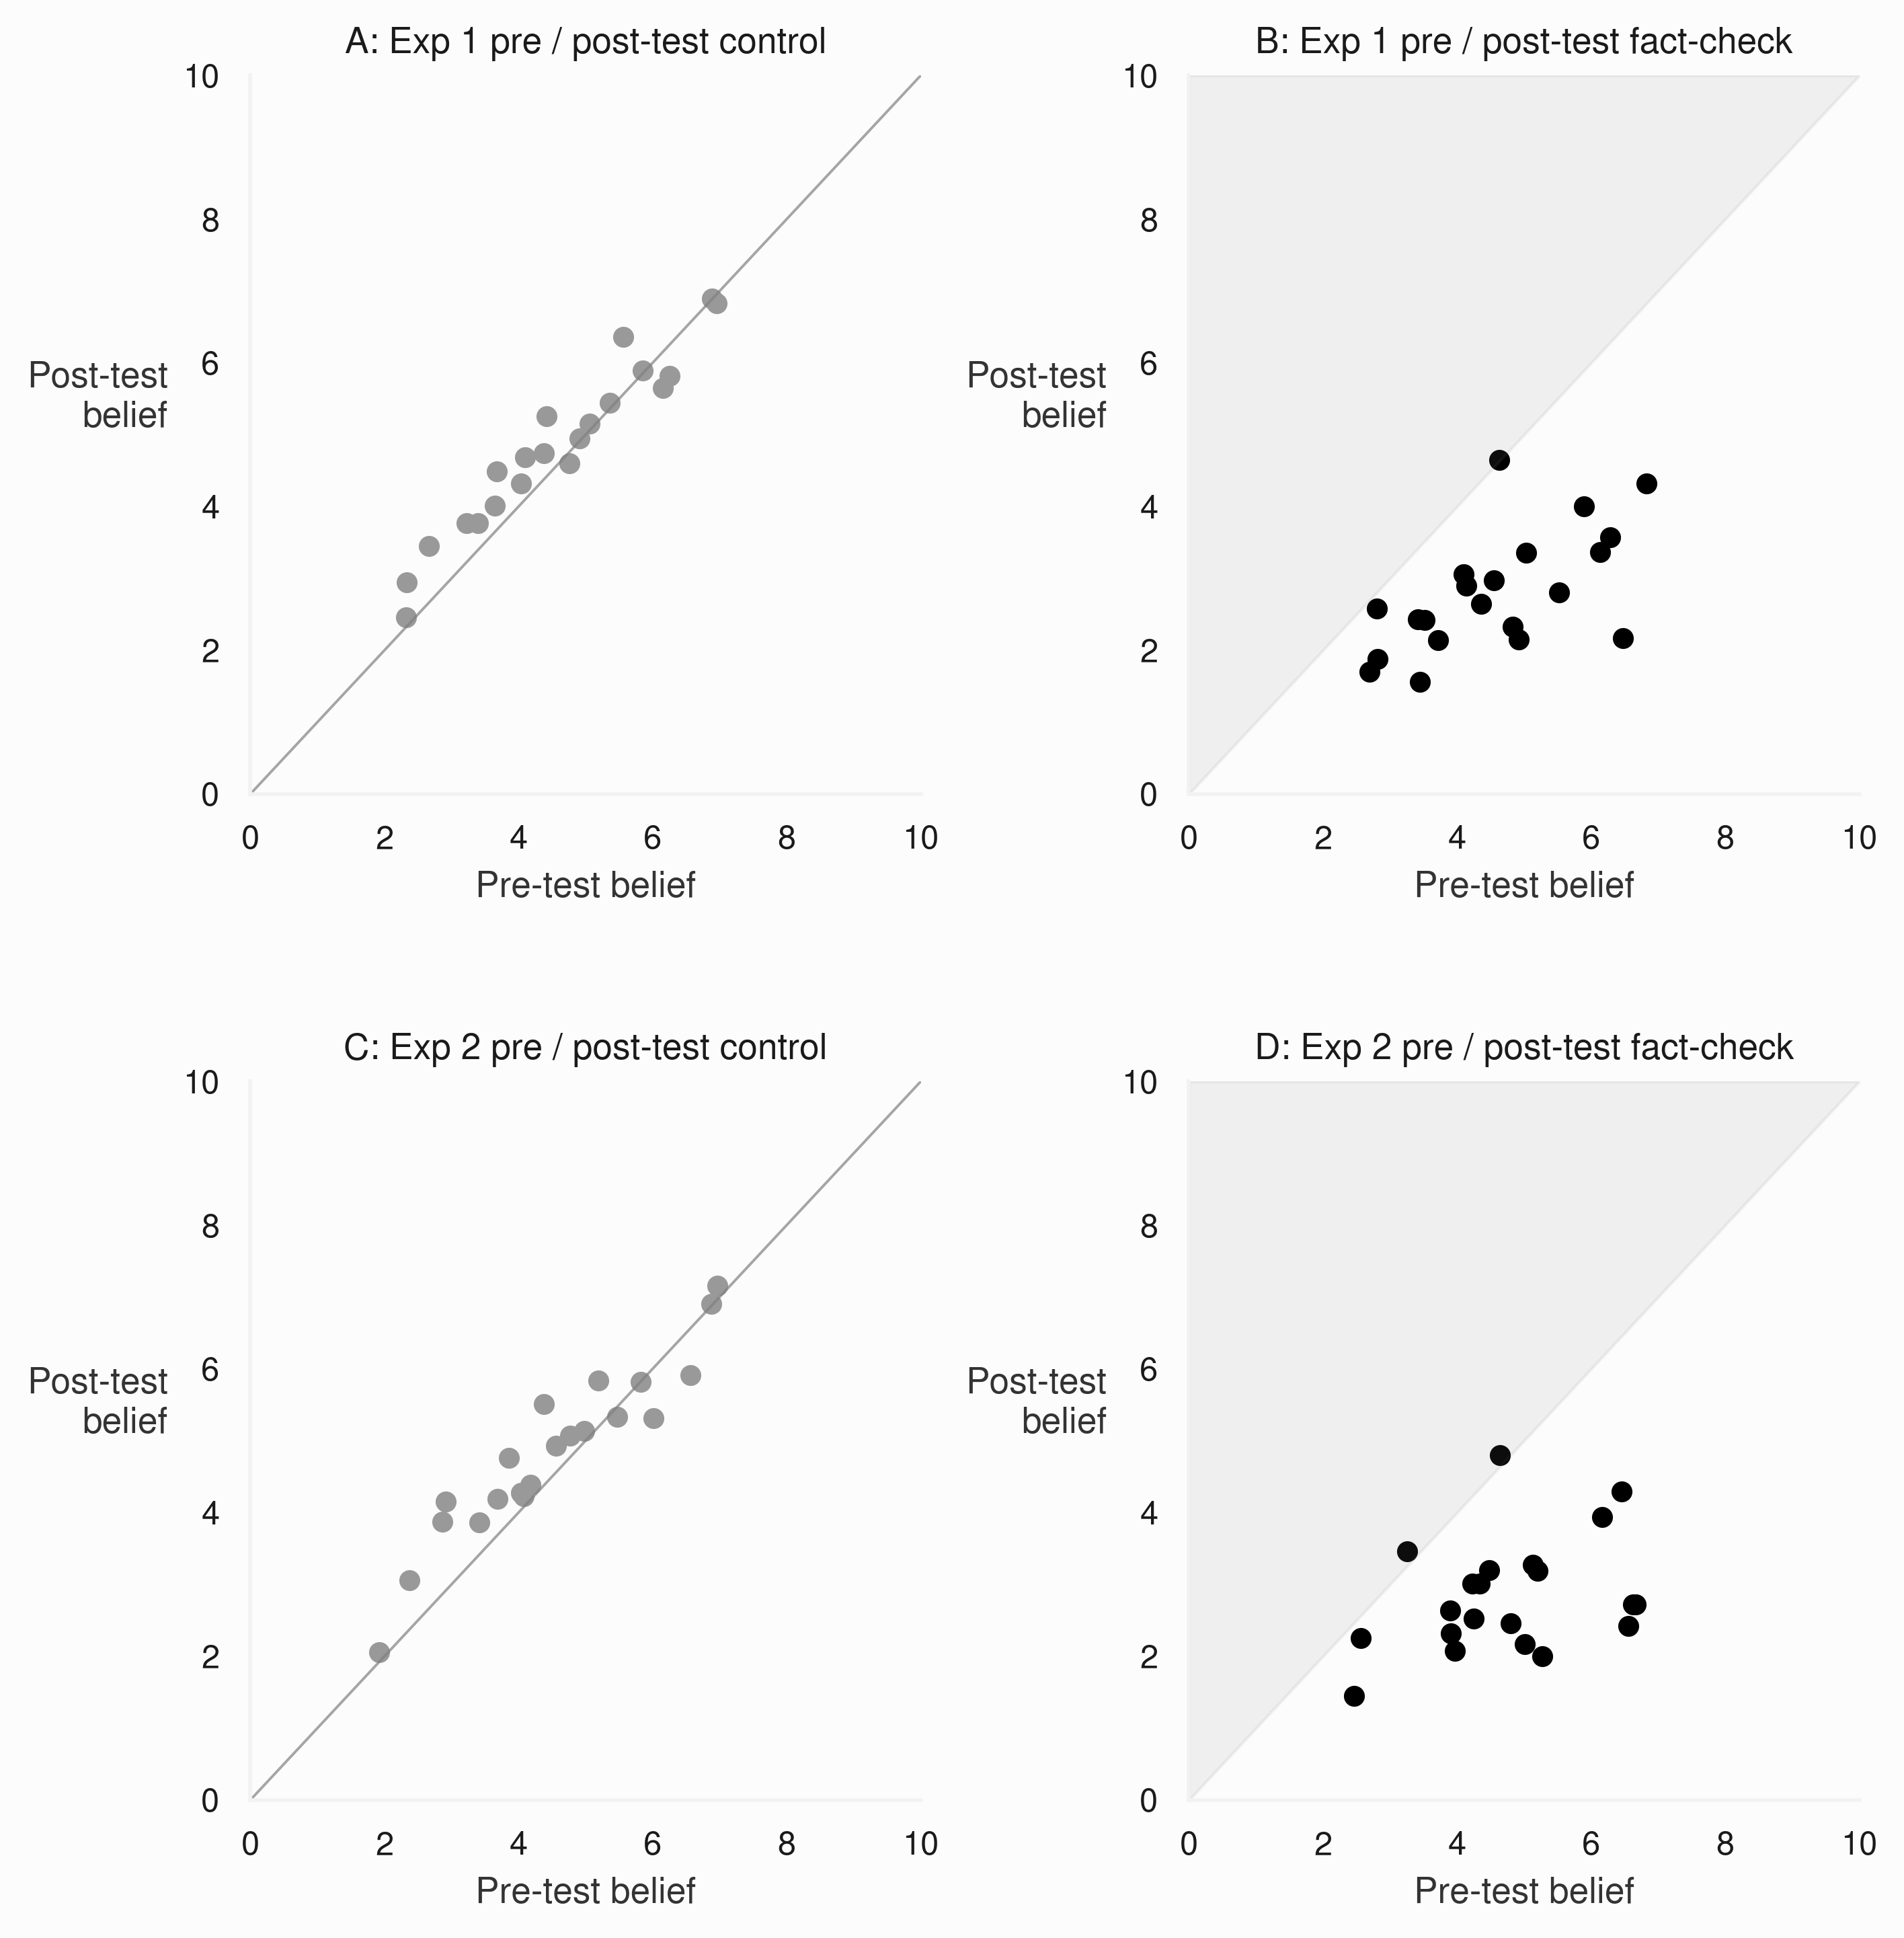

In [182]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, gridspec_kw={'hspace': 0.4, 'wspace': 0.4},
                                            figsize=(7.72, 1.1*7.72))
ax1.plot([0, 10], [0, 10], color='gray', lw=0.7, alpha=0.7)
ax1.scatter(
    exp1.query('condition == @CTRL & type_ == "Belief 1"').groupby("item").mean()["response"],
    exp1.query('condition == @CTRL & type_ == "Belief 2"').groupby("item").mean()["response"],
    c=COL1
)

#ax1.legend([plt.Circle((0, 0), 1, color=COL2), plt.Circle((0, 0), 1, color=COL1)],
#          ["Misinformation", "Fact"], loc='upper left')

ax1.set_title("A: Exp 1 pre / post-test control")
ax1.set_xlabel("Pre-test belief")
ax1.set_ylabel("Post-test\nbelief", ha='right', rotation='horizontal')
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 10])
# ax1.fill_between([0, 10], [0, 10], [10, 10], alpha=0.1, color='grey')

ax2.scatter(
    exp1.query('condition == @INTR & type_ == "Belief 1"').groupby("item").mean()["response"],
    exp1.query('condition == @INTR & type_ == "Belief 2"').groupby("item").mean()["response"],
    c=COL2,
)

#ax2.legend([plt.Circle((0, 0), 1, color=COL2), plt.Circle((0, 0), 1, color=COL1)],
#          ["Misinformation", "Fact"], loc='upper left')

ax2.set_title("B: Exp 1 pre / post-test fact-check")
ax2.set_xlabel("Pre-test belief")
ax2.set_ylabel("Post-test\nbelief", ha='right', rotation='horizontal')
ax2.set_xlim([0, 10])
ax2.set_ylim([0, 10])
ax2.fill_between([0, 10], [0, 10], [10, 10], alpha=0.1, color='grey')

ax3.plot([0, 10], [0, 10], color='gray', lw=0.7, alpha=0.7)
ax3.scatter(
    exp2.query('condition == @CTRL & type_ == "Belief 1"').groupby("item").mean()["response"],
    exp2.query('condition == @CTRL & type_ == "Belief 2"').groupby("item").mean()["response"],
    c=COL1,
)

#ax3.legend([plt.Circle((0, 0), 1, color=COL2), plt.Circle((0, 0), 1, color=COL1)],
#          ["Misinformation", "Fact"], loc='upper left')

ax3.set_title("C: Exp 2 pre / post-test control")
ax3.set_xlabel("Pre-test belief")
ax3.set_ylabel("Post-test\nbelief", ha='right', rotation='horizontal')
ax3.set_xlim([0, 10])
ax3.set_ylim([0, 10])
# ax3.fill_between([0, 10], [0, 10], [10, 10], alpha=0.1, color='grey')

ax4.scatter(
    exp2.query('condition == @INTR & type_ == "Belief 1"').groupby("item").mean()["response"],
    exp2.query('condition == @INTR & type_ == "Belief 2"').groupby("item").mean()["response"],
    c=COL2,
)

#ax4.legend([plt.Circle((0, 0), 1, color=COL2), plt.Circle((0, 0), 1, color=COL1)],
#          ["Misinformation", "Fact"], loc='upper left')

ax4.set_title("D: Exp 2 pre / post-test fact-check")
ax4.set_xlabel("Pre-test belief")
ax4.set_ylabel("Post-test\nbelief", ha='right', rotation='horizontal')
ax4.set_xlim([0, 10])
ax4.set_ylim([0, 10])
ax4.fill_between([0, 10], [0, 10], [10, 10], alpha=0.1, color='grey')

fig.savefig('fig-2.png')

# Figure 2

One version where the items line up and one where they don't. Item numbering is using Experiment 2 numbering even though Experiment 1 doesn't use that numbering system.

In [4]:
exp2_myths

array([ 0,  1,  4,  5,  6,  7, 12, 15, 17, 18, 21, 22, 23, 25, 27, 28, 29,
       32, 34, 38, 41])

In [25]:
deltas1 = pd.merge(exp1.query("type_ == 'Belief 1'"),
                  exp1.query("type_ == 'Belief 2'"),
                  on=[ID_COL, 'item'])[
    [ID_COL, 'item', 'response_x', 'response_y', 'condition_x', 'truth_x']]

deltas1 = deltas1.query("truth_x == 0")
deltas1.eval("delta = response_y - response_x", inplace=True)
deltas1.eval("backfire = 100 * (delta >= 2)", inplace=True)
# convert item numbers to experiment 2's versions
deltas1['item'] = [exp2_questions.index(exp1_questions[q])
                  for q in deltas1['item']]



deltas2 = pd.merge(exp2.query("type_ == 'Belief 1'"),
                  exp2.query("type_ == 'Belief 2'"),
                  on=[ID_COL, 'item'])[
    [ID_COL, 'item', 'response_x', 'response_y', 'condition_x', 'truth_x']]

deltas2 = deltas2.query("truth_x == 0")
deltas2.eval("delta = response_y - response_x", inplace=True)
deltas2.eval("backfire = 100 * (delta >= 2)", inplace=True)
averages = [np.mean(pd.concat([deltas1.query("item == @i")['backfire'],
                             deltas2.query("item == @i")['backfire']]))
           for i in exp2_myths]
order_combo = exp2_myths[np.argsort(averages)]

In [26]:
def wilson(trials, alpha=0.05):
    """Wilson score test with continuity correction for boolean array input.
    Returns the deltas, so (se_low, se_high) with the given alpha (e.g., 0.05)"""
    n = len(trials)
    p = np.mean(trials)
    z = stats.norm.ppf(1 - alpha / 2)
    z2 = z ** 2
    center = 2 * n * p + z2
    denom = 2*(n + z2)
    delta = z * np.sqrt(z2 - (1 / n) + 4 * n * p * (1 - p) + (4 * p - 2)) + 1
    low = max(0, (center - delta) / denom)
    high = min(1, (center + delta) / denom)
    return (p - low, high - p)

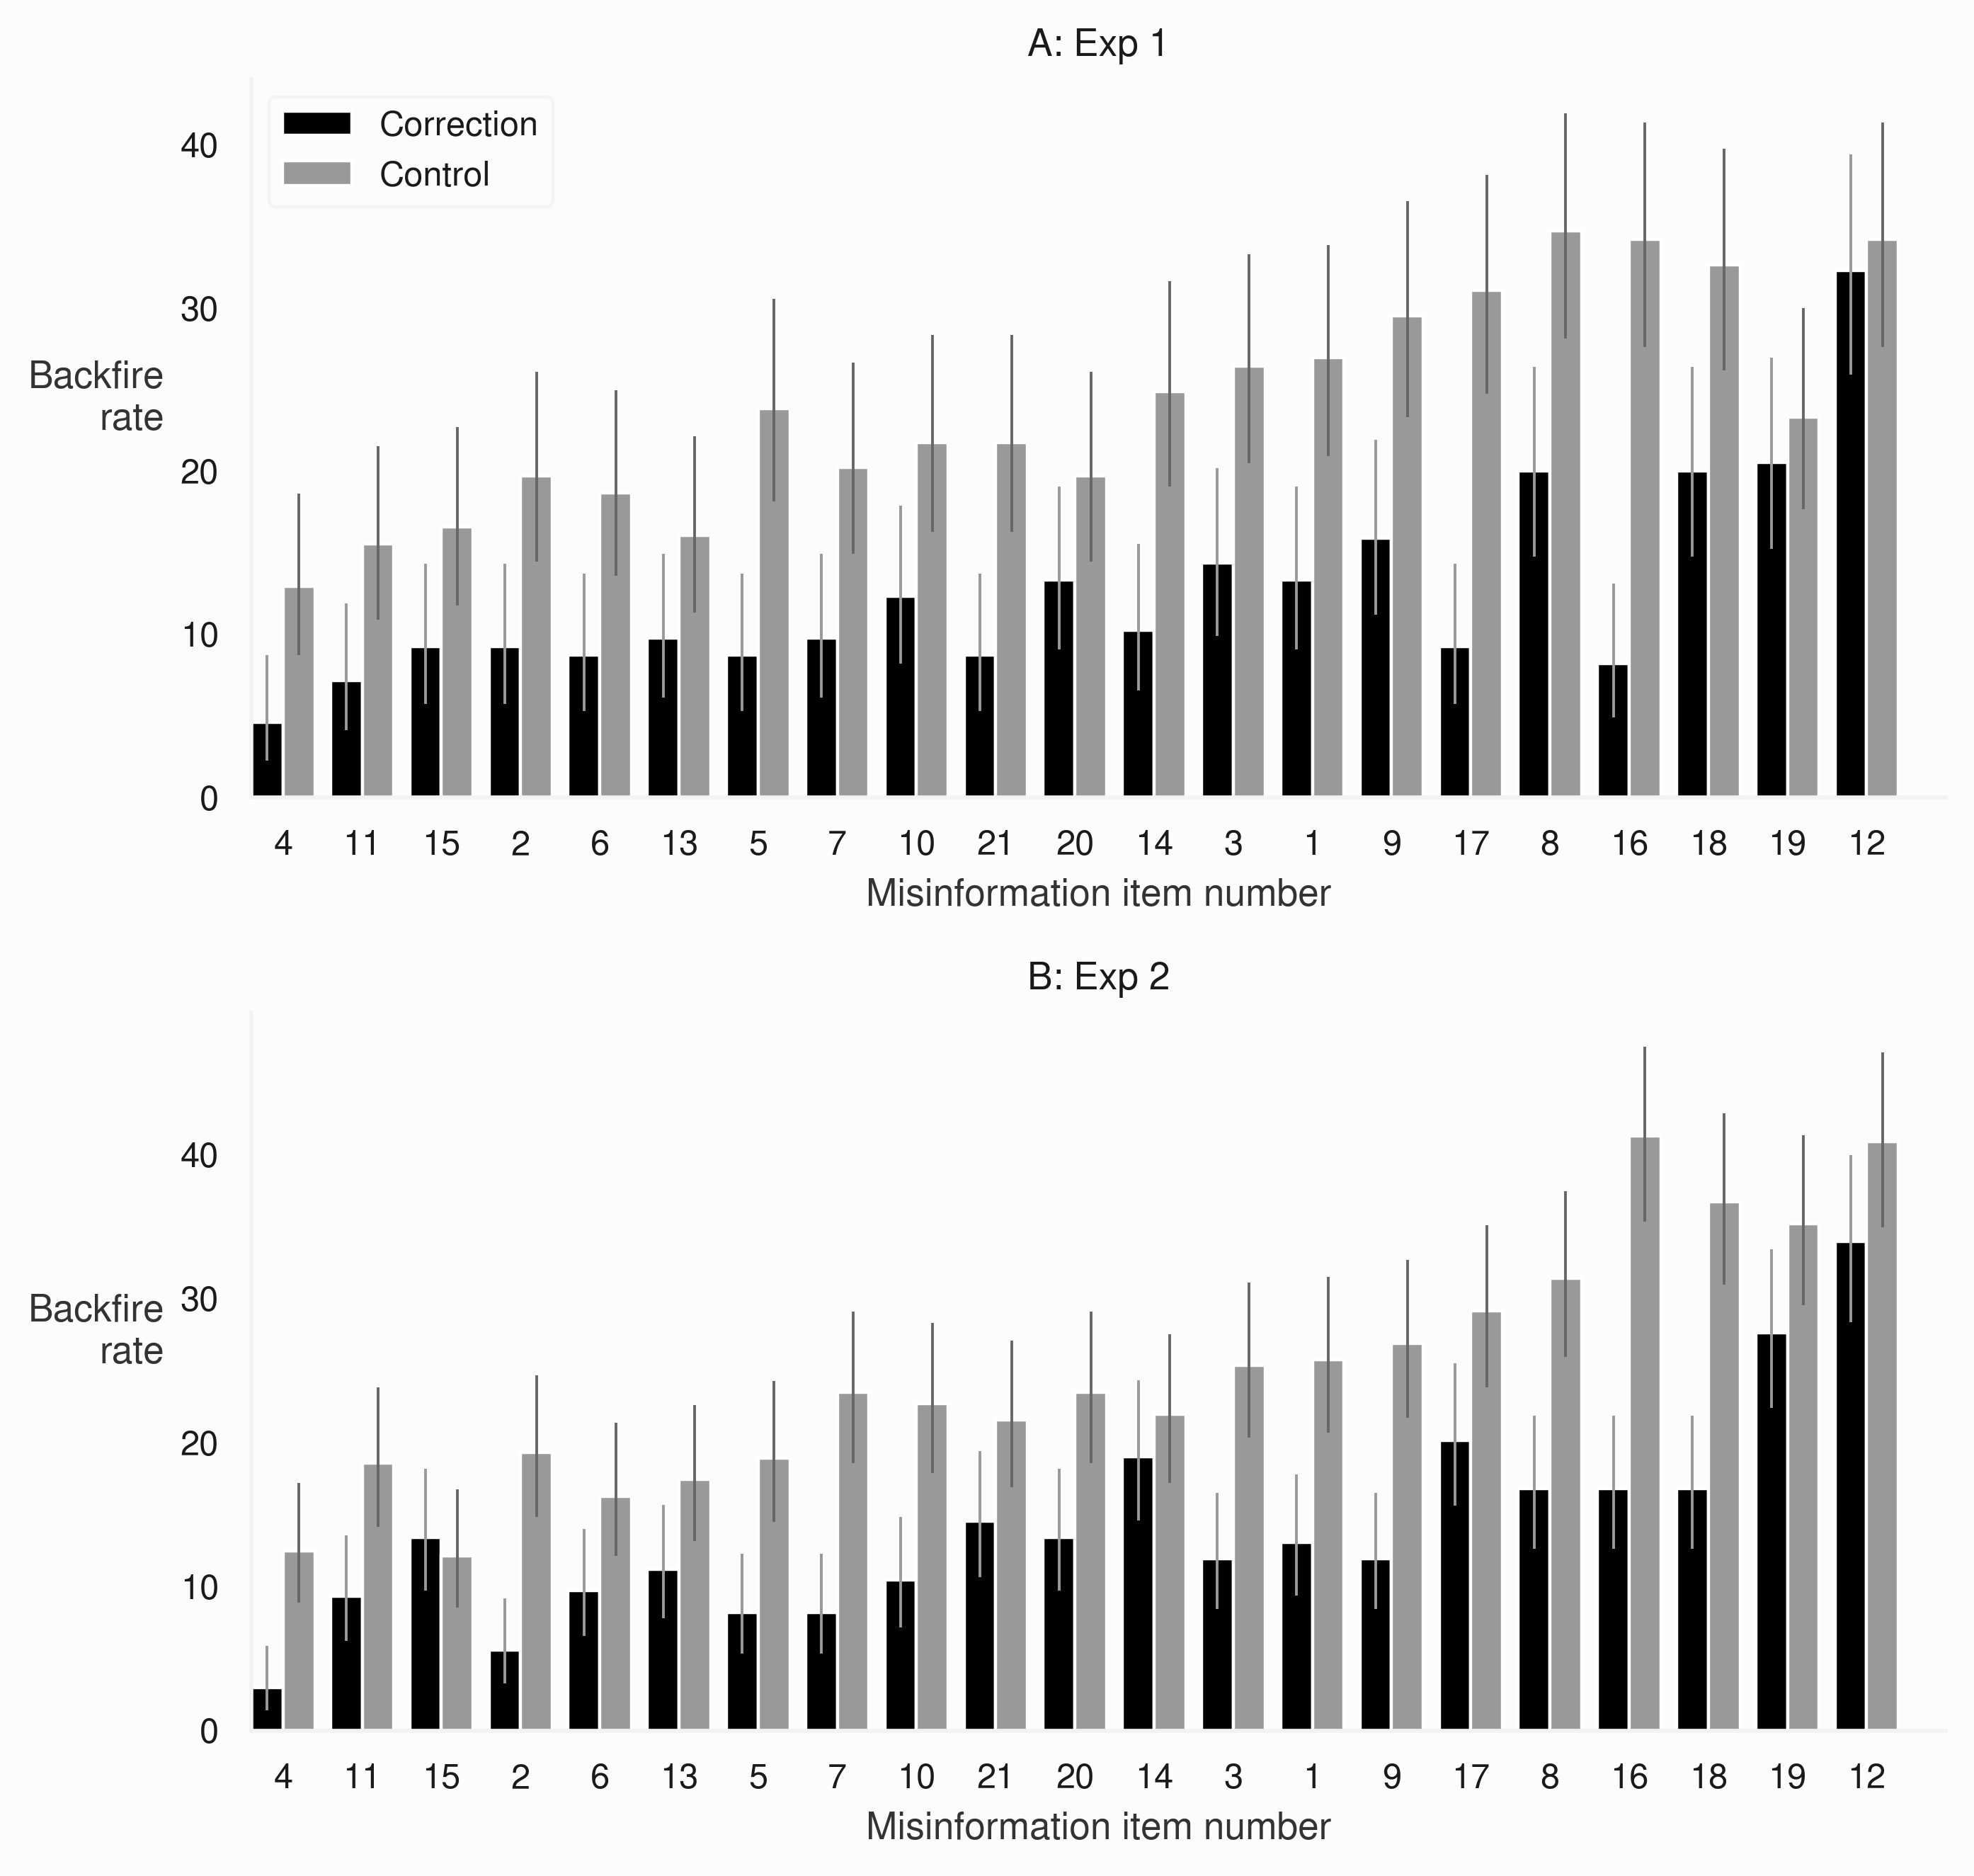

In [138]:
width=0.4
xx = np.arange(len(order_combo))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.72, 7.72), gridspec_kw={'hspace': 0.3})
kwargs={
    'alpha': 1,
}
bars11 = ax1.bar(
    x=xx - width/2,
    height=deltas1.query('condition_x == @INTR').groupby("item").mean().loc[
        order_combo, "backfire"],
    width=width,
    color=COL2,
    yerr=np.array([wilson(deltas1.query('condition_x == @INTR and item == @i')['backfire'] == 100)
         for i in order_combo]).T * 100,
    label='Correction',
    **kwargs
)

bars12 = ax1.bar(
    x=xx + width/2,
    height=deltas1.query('condition_x == @CTRL').groupby("item").mean().loc[
        order_combo, "backfire"],
    width=width,
    color=COL1,
    yerr=np.array([wilson(deltas1.query('condition_x == @CTRL and item == @i')['backfire'] == 100)
         for i in order_combo]).T * 100,
    label='Control',
    **kwargs
)

ax1.set_xlabel("Misinformation item number")
ax1.set_xlim([-width, 21])
ax1.set_xticks(xx)
ax1.set_xticklabels([list(exp2_myths).index(i) + 1 for i in order_combo])

ax1.set_ylabel("Backfire\nrate", ha='right', rotation='horizontal')
ax1.set_yticks(np.arange(0, 41, 10))

ax1.set_title("A: Exp 1")

bars21 = ax2.bar(
    x=xx - width/2,
    height=deltas2.query('condition_x == @INTR').groupby("item").mean().loc[
        order_combo, "backfire"],
    width=width,
    color=COL2,
    yerr=np.array([wilson(deltas2.query('condition_x == @INTR and item == @i')['backfire'] == 100)
         for i in order_combo]).T * 100,
    label='Correction',
    **kwargs
)

bars22 = ax2.bar(
    x=xx + width/2,
    height=deltas2.query('condition_x == @CTRL').groupby("item").mean().loc[
        order_combo, "backfire"],
    width=width,
    color=COL1,
    yerr=np.array([wilson(deltas2.query('condition_x == @CTRL and item == @i')['backfire'] == 100)
         for i in order_combo]).T * 100,
    label='Control',
    **kwargs
)

ax2.set_xlabel("Misinformation item number")
ax2.set_xlim([-width, 21])
ax2.set_xticks(xx)
ax2.set_xticklabels([list(exp2_myths).index(i) + 1 for i in order_combo])

ax2.set_ylabel("Backfire\nrate", ha='right', rotation='horizontal')
ax2.set_yticks(np.arange(0, 41, 10))

ax2.set_title("B: Exp 2")
    
for bars in (bars11, bars21):
    lc = bars.errorbar[2][0]
    lc.set_color('#999f')
    lc.set_linewidth(0.7)
    
for bars in (bars12, bars22):
    lc = bars.errorbar[2][0]
    lc.set_color('#666f')
    lc.set_linewidth(0.7)
    
plt.rcParams["hatch.linewidth"] = 1

#ax2.legend(*ax1.get_legend_handles_labels(), loc='upper left')
ax1.legend(loc='upper left')

fig.savefig('fig-3.png', bbox_inches='tight')

# Item-Level Scatterplots

In [10]:
exp1.describe()

,condition,response,item,truth
count,81480.000000,81480.000000,81480.000000,81480.000000
mean,1.497423,5.283812,20.500000,0.500000
std,0.499996,3.666790,12.120993,0.500003
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,10.000000,0.000000
50%,1.000000,5.000000,20.500000,0.500000
75%,2.000000,9.000000,31.000000,1.000000
max,2.000000,10.000000,41.000000,1.000000


In [11]:
exp1_renumbered = exp1.copy()
exp1_renumbered['item'] = [exp2_questions.index(exp1_questions[q]) for q in exp1['item']]
exp1_il = exp1_renumbered.query('cond == "Intervention"').pivot_table(
    index=[ID_COL, "item"], columns="type_", values="response")
exp1_il['backfire'] = (exp1_il['Belief 2'] - exp1_il['Belief 1']) >= 2
exp1_backfire = exp1_il.groupby('item').mean()['backfire'] * 100

exp2_il = exp2.query('cond == "Intervention"').pivot_table(index=[ID_COL, "item"], columns="type_", values="response")
exp2_il['backfire'] = (exp2_il['Belief 2'] - exp2_il['Belief 1']) >= 2
exp2_backfire = exp2_il.groupby('item').mean()['backfire'] * 100

both_ctrl = pd.concat(
    (exp1_renumbered.query('cond == "Control"'),
    exp2.query('cond == "Control"')),
    ignore_index=True
)

combo = both_ctrl.pivot_table(index=[ID_COL, "item"], columns="type_", values="response")
combo['backfire'] = (combo['Belief 2'] - combo['Belief 1']) >= 2
backfire_pct = combo.groupby('item').mean()['backfire'] * 100
rel = np.array([stats.spearmanr(combo.query('item == @i')['Belief 1'],
                     combo.query('item == @i')['Belief 2'])[0] for i in range(42)])

In [12]:
s = plt.rcParams['lines.markersize'] ** 2

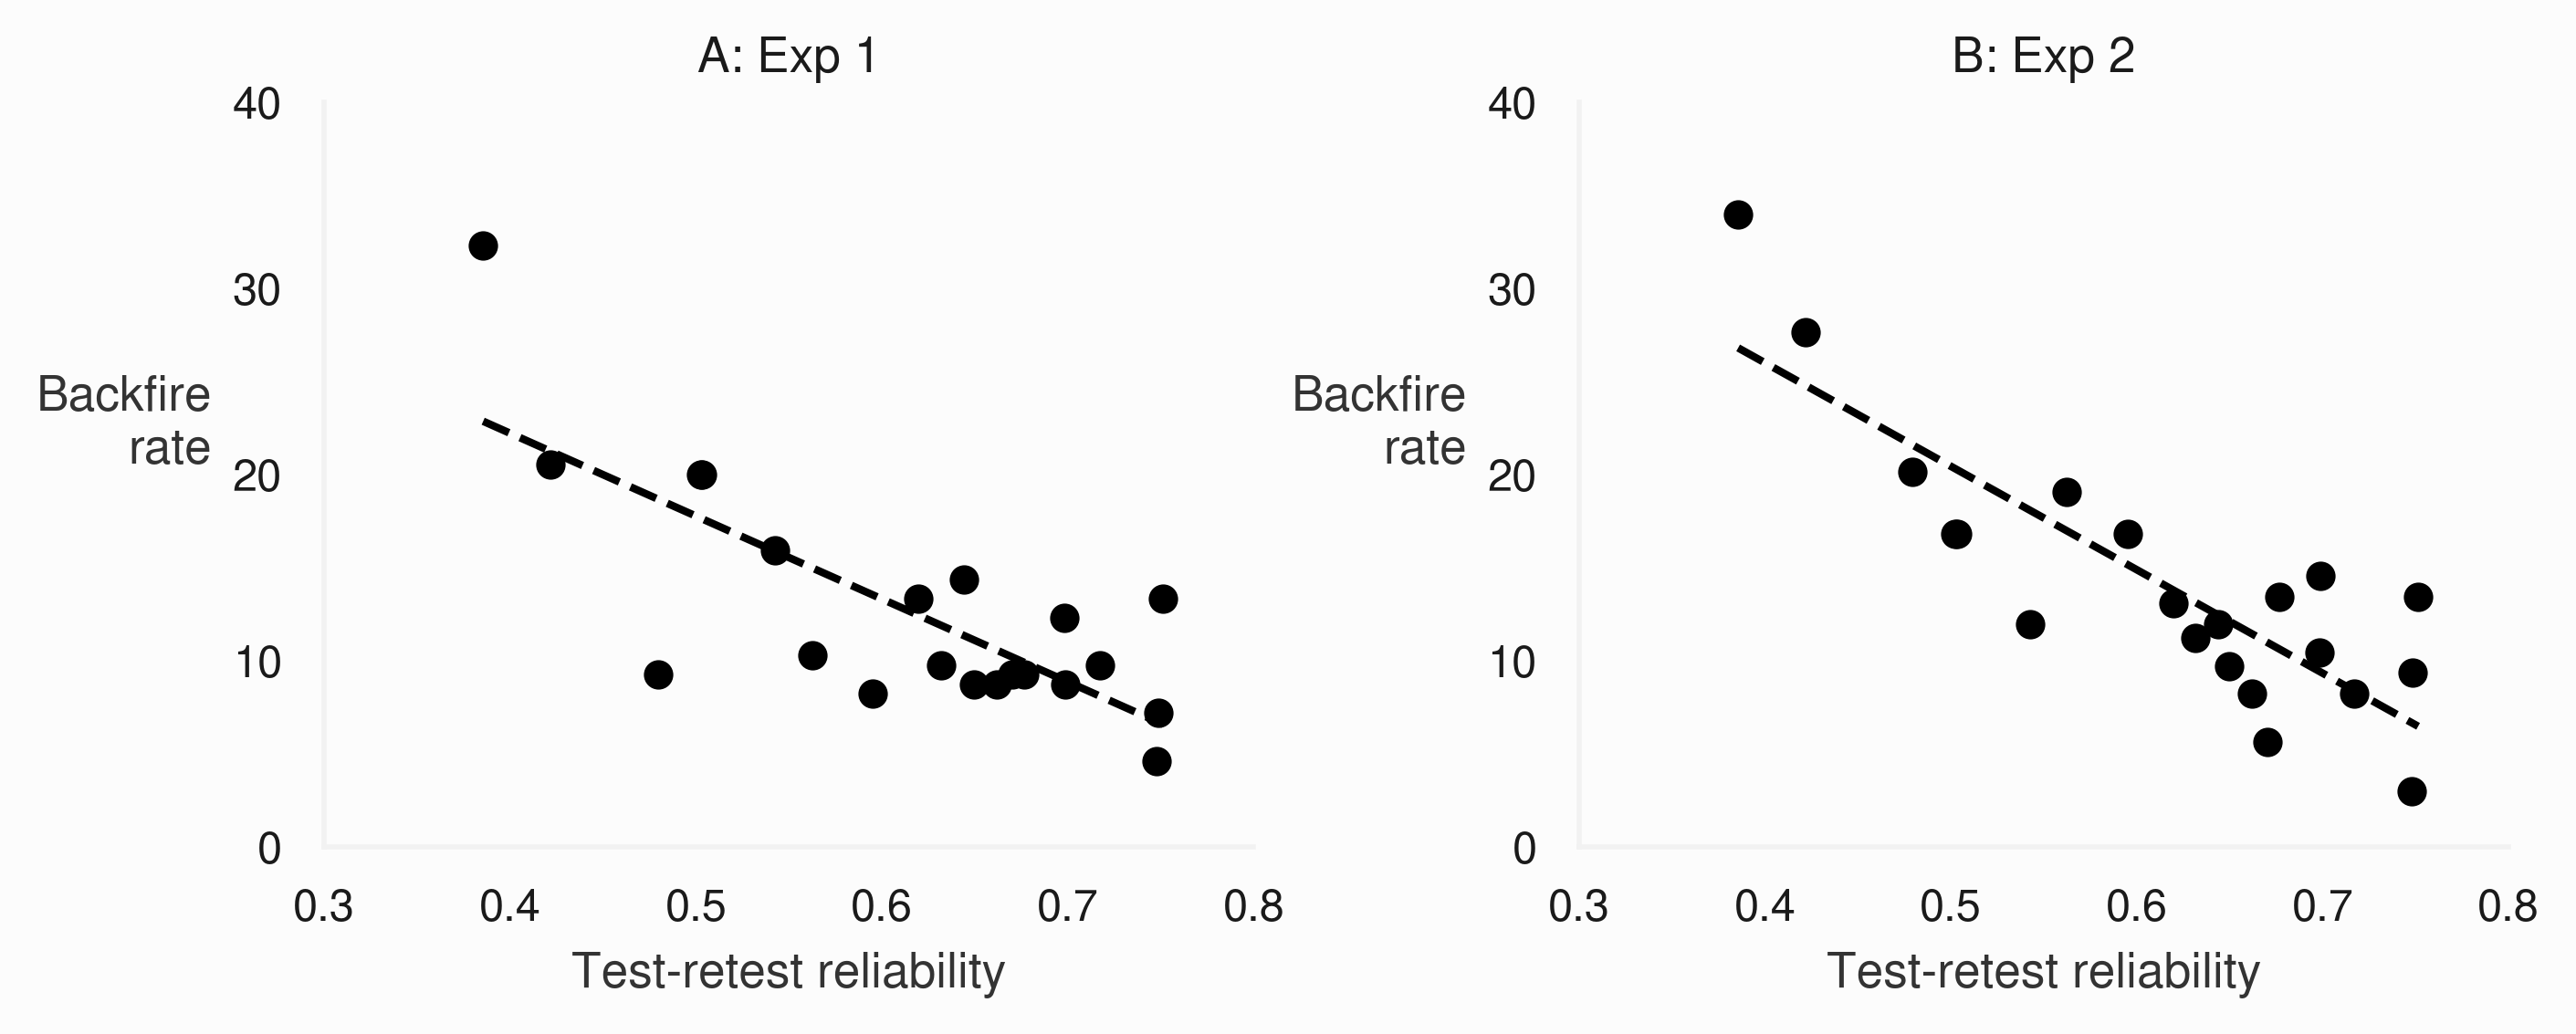

In [159]:
fig4color = 'black'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.72, 0.35*7.72),
                              gridspec_kw={'wspace': 0.35})
sns.regplot(x=rel[exp2_myths], y=exp1_backfire[exp2_myths], ax=ax1, ci=None,
           line_kws={'linestyle': '--', 'color': fig4color, 'linewidth': 1.5}, 
            color=fig4color,scatter_kws={'alpha': 1, 'ec': fig4color, 's': s})
ax1.set_xlim([0.3, 0.8])
ax1.set_ylim([0, 40])
ax1.set_yticks([0, 10, 20, 30, 40])
ax1.set_xlabel("Test-retest reliability")
ax1.set_ylabel("Backfire\nrate", rotation='horizontal', ha='right')
ax1.set_title("A: Exp 1");

ax2.set_xlim([0.3, 0.8])
ax2.set_ylim([0, 40])
sns.regplot(x=rel[exp2_myths], y=exp2_backfire[exp2_myths], ax=ax2, ci=None,
           line_kws={'linestyle': '--', 'color': fig4color, 'linewidth': 1.5}, color=fig4color,
           scatter_kws={'alpha': 1, 'ec': fig4color, 's': s})
ax2.set_xlabel("Test-retest reliability")
ax2.set_ylabel("Backfire\nrate", rotation='horizontal', ha='right')
ax2.set_title('B: Exp 2');
ax2.set_yticks([0, 10, 20, 30, 40])

fig.savefig('fig-4.png', bbox_inches='tight')

# Collapsed Condition-Level

In [14]:
exp1

,condition,What is your Prolific ID?,question,response,item,type_,cond,truth
0,2,559e7713fdf99b7a9a12410b,The daddy long legs spider is extremely venomo...,2,0,Belief 1,Control,0
1,2,55a43cf3fdf99b02ff6cb0b4,The daddy long legs spider is extremely venomo...,3,0,Belief 1,Control,0
2,2,55aa6c2ffdf99b632940aaaa,The daddy long legs spider is extremely venomo...,5,0,Belief 1,Control,0
3,2,55ac22cafdf99b6de2fa7ee2,The daddy long legs spider is extremely venomo...,5,0,Belief 1,Control,0
4,2,55b53384fdf99b2b69c82509,The daddy long legs spider is extremely venomo...,1,0,Belief 1,Control,0
...,...,...,...,...,...,...,...,...
102039,1,191,Humans can regrow the tips of fingers and toes...,1,41,Belief 2,Intervention,1
102040,1,192,Humans can regrow the tips of fingers and toes...,0,41,Belief 2,Intervention,1
102041,1,193,Humans can regrow the tips of fingers and toes...,10,41,Belief 2,Intervention,1
102042,1,194,Humans can regrow the tips of fingers and toes...,8,41,Belief 2,Intervention,1


In [16]:
grouped.agg(errf).loc['Control', 'response']

type_     truth
Belief 1  0        0.100760
Belief 2  0        0.092813
Name: response, dtype: float64

In [17]:
exp2

,condition,What is your Prolific ID?,question,response,item,type_,cond,truth
532,2,5e31f103a976891de17f30d2,The daddy long legs spider is extremely venomo...,0,0,Belief 1,Control,0
533,2,5da7825f634607001172ca6a,The daddy long legs spider is extremely venomo...,4,0,Belief 1,Control,0
534,2,5da8893e7a7b6a0011965f84,The daddy long legs spider is extremely venomo...,7,0,Belief 1,Control,0
535,2,5e5d730f62ff4608804ad7a5,The daddy long legs spider is extremely venomo...,4,0,Belief 1,Control,0
536,1,5da20df461471f0014bb184e,The daddy long legs spider is extremely venomo...,1,0,Belief 1,Intervention,0
...,...,...,...,...,...,...,...,...
140975,2,5cf7dd949b3f4d0018a798b6,Mercury in vaccines can cause harm. - Do you b...,5,41,Belief 2,Control,0
140976,1,5e7c00b3c53e35000be9927c,Mercury in vaccines can cause harm. - Do you b...,0,41,Belief 2,Intervention,0
140977,2,5c87ab25c23f2d0015563f46,Mercury in vaccines can cause harm. - Do you b...,5,41,Belief 2,Control,0
140978,2,5d5c98f6121fc80001960e82,Mercury in vaccines can cause harm. - Do you b...,10,41,Belief 2,Control,0


In [18]:
ind = pd.MultiIndex.from_product((('Experiment 1', 'Experiment 2'),
                           ('Pre-test', 'Post-test'),
                           ('Control', 'Correction')),
                                names=['exp', 'time', 'cond'])
df = pd.DataFrame(index=ind, columns=['u', 'low', 'high'], data=
             np.array(((4.568715, 3.932019, 5.20541),
(4.571306, 3.971515, 5.171097),
(4.832223, 4.288994, 5.375452),
(2.80928, 2.428987, 3.189572),
(4.518759, 3.868343, 5.169175),
(4.753554, 4.186014, 5.321093),
(4.518759, 3.868343, 5.169175),
(2.851812, 2.487173, 3.216452))))
df['err'] = df['high'] - df['u']

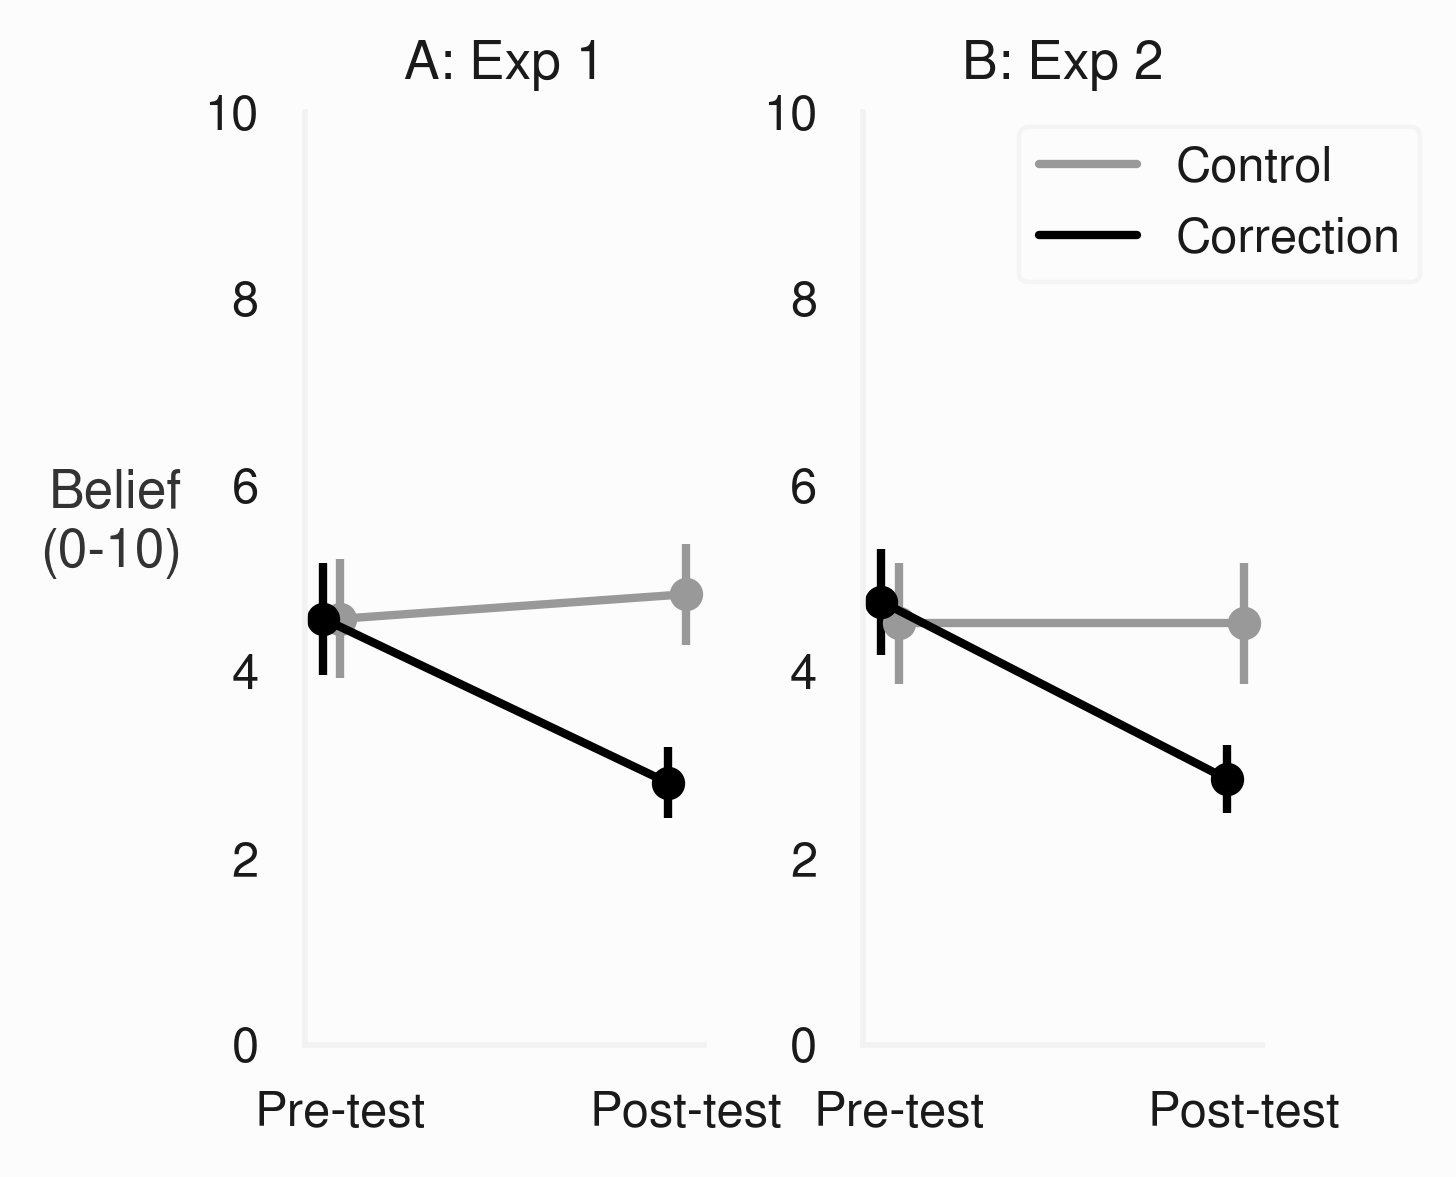

In [184]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.72*0.8*0.5, 7.72*0.8*0.5),
                              gridspec_kw={'wspace': 0.4})
dodge = -0.05
ms = 5
kwargs = {
    'markersize': ms,
    'linewidth': 1.5,
    'elinewidth': 1.5
}

for exp, ax in zip(('Experiment 1', 'Experiment 2'), (ax1, ax2)):
    for cond, col, style, dodge in zip(['Control', 'Correction'], [COL1, COL2], 
                                       ('o-', 'o-'), (0, dodge)):
        subset = df.reset_index().query('cond == @cond and exp == @exp')
        ax.errorbar([0 + dodge, 1 + dodge], subset['u'], subset['err'], None, 
                    style, c=col, **kwargs)

ax1.set_title('A: Exp 1')

ax1.set_xticks([0, 1])
ax1.set_xticklabels(["Pre-test", "Post-test"])
ax1.set_yticks(np.arange(0, 11, 2))
ax1.set_ylabel('Belief\n(0-10)', rotation='horizontal', ha='right')

ax2.set_title('B: Exp 2')

ax2.set_xticks([0, 1])
ax2.set_xticklabels(["Pre-test", "Post-test"])
ax2.set_yticks(np.arange(0, 11, 2))
ax2.set_ylabel('', rotation='horizontal', ha='right')

fig.legend([plt.Line2D((0, 0), (0, 1), color=COL1), 
            plt.Line2D((0, 0), (0, 1), color=COL2)],
           ['Control', 'Correction'], loc=(0.7, 0.76))
fig.savefig("fig-1.png", dpi=400, bbox_inches='tight')